# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [5]:
chipo = pd.read_csv('../../../../data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

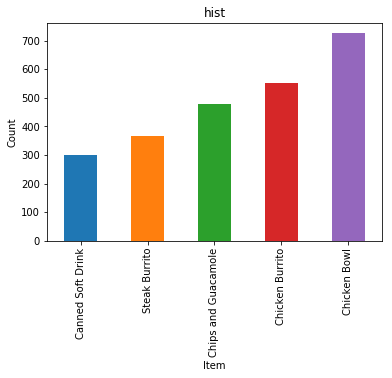

In [18]:
a = chipo['item_name'].value_counts()[4::-1]
a.plot(kind='bar')
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('hist');

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [20]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

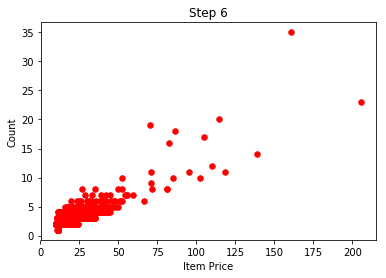

In [32]:
b = chipo.groupby(['order_id'])[['quantity', 'item_price']].sum()
b.plot(kind='scatter', x='item_price', y='quantity', c='red', s=30);
plt.xlabel("Item Price")
plt.ylabel("Count")
plt.title('Step 6');

### Step 7. BONUS: Create a question and a graph to answer your own question.

Plot first 10 items with biggest price

Text(0,0.5,'Price')

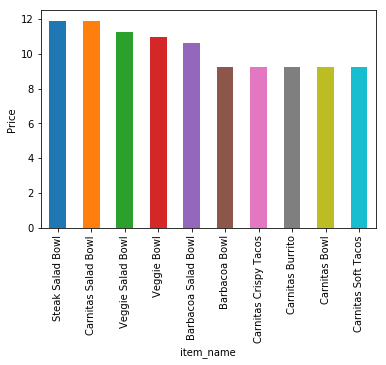

In [38]:
c = chipo[chipo['quantity']==1].groupby('item_name').median()
c = c.sort_values(['item_price'], ascending=False)
c.iloc[:10, c.columns.get_loc('item_price')].plot(kind = 'bar');
plt.ylabel("Price")